A diagnostic test with with confusion matrix is applied to 2030 people to look for a disorder with a population.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('confusionmatrix.csv')

In [3]:
data

,Test Outcome,Sick,Well
0,Diesease,TP = 20,FP = 180
1,No Diesease,FN = 10,TN = 1820


$$ s = \frac{TP}{TP+FN}$$

$$ t = \frac{TN}{TN+FP}$$

In [4]:
from pba import *

In [5]:
TP = 20
FP = 180
FN = 10
TN = 1820

In [6]:
s = cBox(TP,TP+FN)

<function matplotlib.pyplot.show(*args, **kw)>

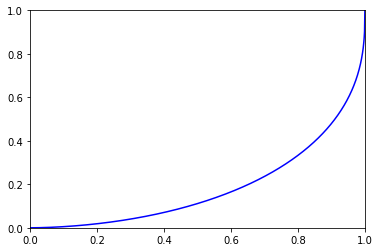

In [32]:
plotcBox(s)

In [8]:
t = cBox(TN,TN+FP)

<function matplotlib.pyplot.show(*args, **kw)>

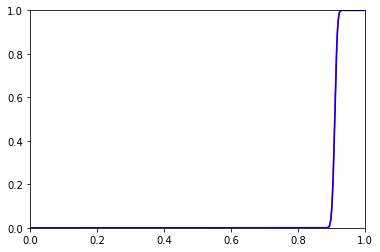

In [9]:
plotcBox(t)

Let's consider the case where there is uncertainty in the test results...

$$ TP=A \times u$$

$$FP= B+A \times (1-u)$$

$$FN=C+(1-w) \times d$$

$$TN = D \times w$$

Hence s and t is given as:

$$ s= \frac{A \times u}{A \times u + C + D\times (1-w)}$$

$$ t= \frac{D\times w}{D \times w +B+A \times (1-u)}$$

## Sensitivity

In [10]:
num = multiplyCboxNnumber(cBox(95,100), TP)
den1= addCboxNnumber(num, FN)
den2= multiplyCboxNnumber(subtractNumberNcbox(1, cBox(180, 200)), TN)
den = addCbox(den1, den2)

Let's write a function that computes a cbox when k and n are cboxes.

In [11]:
def cBoxcBox(kCbox, nCbox, npoints = 100):
    
    focal_elements_k = computeFocalElements(kCbox, npoints = npoints)
    focal_elements_n = computeFocalElements(nCbox, npoints = npoints)
    
    Cbox_list = []
    
    for i in range(npoints):
        Cbox = cBox(focal_elements_k[i], focal_elements_n[i])
        Cbox_list.append(Cbox)
        
    lower_values_list = []
    upper_values_list = []

    for j in range(npoints):    
        lower = Cbox_list[j]['lb']
        upper = Cbox_list[j]['ub']
        lower_values_list.append(lower)
        upper_values_list.append(upper)
    
    import numpy as np    
    average_lower = np.sum(lower_values_list, axis  = 0)/npoints
    average_upper = np.sum(upper_values_list, axis  = 0)/npoints
    x = Cbox_list[0]['support'] 
    
    return {'support' : x, 'lb': average_lower, 'ub': average_upper, 'betaparam': 'unknown'} 

In [12]:
snew=cBoxcBox(num, den)

<function matplotlib.pyplot.show(*args, **kw)>

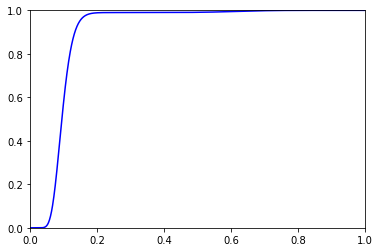

In [13]:
plotcBox(snew)

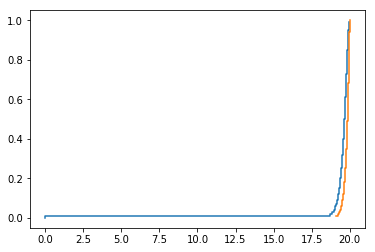

In [14]:
num1 = multiplyCboxNnumber(cBox(99,100), TP, show_plot=True)

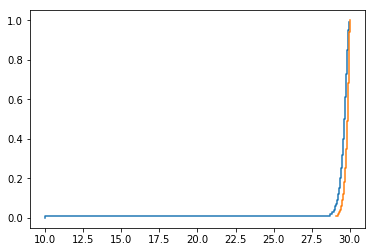

In [15]:
den11= addCboxNnumber(num1, FN, show_plot=True)

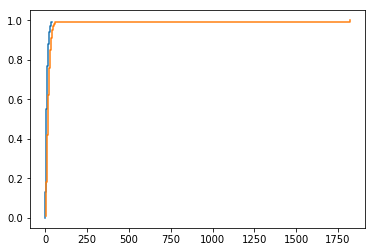

In [16]:
den21= multiplyCboxNnumber(subtractNumberNcbox(1, cBox(199, 200)), TN, show_plot=True)

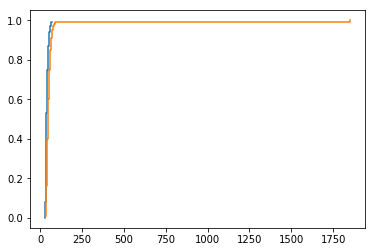

In [17]:
den1 = addCbox(den11, den21, show_plot=True)

In [18]:
snew1=cBoxcBox(num1, den1)

<function matplotlib.pyplot.show(*args, **kw)>

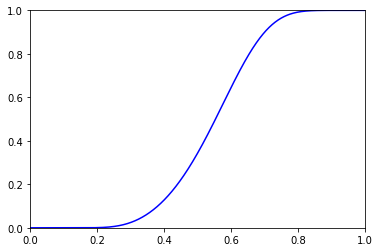

In [19]:
plotcBox(snew1)

## Specificity

In [20]:
num = multiplyCboxNnumber(cBox(85,100), TN)
den1= addCboxNnumber(num, FP)
den2= multiplyCboxNnumber(subtractNumberNcbox(1, cBox(70, 100)), TP)
den = addCbox(den1, den2)
snew=cBoxcBox(num, den)

In [21]:
num = multiplyCboxNnumber(cBox(1,20000), TN)

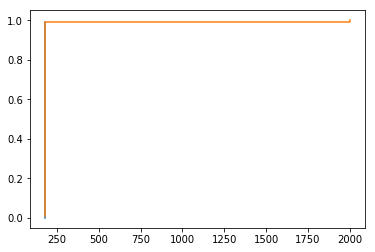

In [22]:
den1= addCboxNnumber(num, FP, show_plot=True)

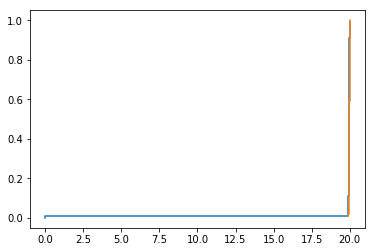

In [23]:
den2= multiplyCboxNnumber(subtractNumberNcbox(1, cBox(1, 1000)), TP, show_plot=True)

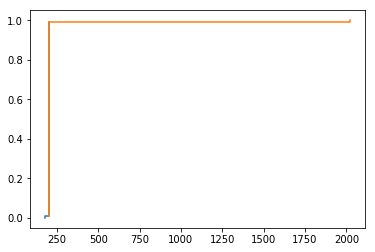

In [24]:
den = addCbox(den1, den2, show_plot=True)

In [25]:
snew=cBoxcBox(num, den)

<function matplotlib.pyplot.show(*args, **kw)>

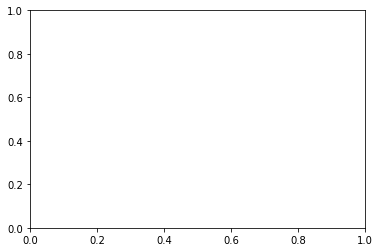

In [26]:
plotcBox(snew)

getting nan's..... :(

Let's consider a case where the inputs of the confusion matrix are cboxes

In [33]:
TP= cBox(19, 20)
FP= cBox(179, 180)
FN = cBox(9, 10)
TN = cBox(1819, 1820)

In [43]:
s = cBoxcBox(TP, addCbox(TP, FN))

<function matplotlib.pyplot.show(*args, **kw)>

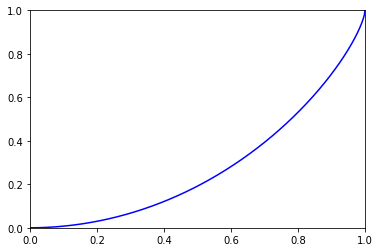

In [35]:
plotcBox(s)

In [42]:
fet=computeFocalElements(s)
fet

[]

In [36]:
t = cBoxcBox(FP, addCbox(FP, TN))

<function matplotlib.pyplot.show(*args, **kw)>

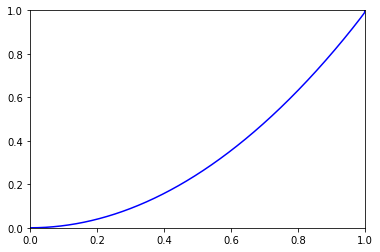

In [37]:
plotcBox(t)

gives upper bound confidence level